In [58]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
plt.rcParams.update({"figure.dpi":130})


In [75]:
db= pd.read_csv('output/database.csv', sep=' ')
db.tail()

,label,mount,move,posid,direction,speed,motor,angle,xpix,ypix,peaks,fwhm
62,arcphi15-20230203-135642,0,20230203-135942,4852,ccw,cruise,phi,15,1974.445727,938.294885,73679.2652,3.2591
63,arcphi15-20230203-135642,0,20230203-135951,4852,ccw,cruise,phi,15,1979.136792,910.061193,73264.1201,3.2871
64,arcphi15-20230203-135642,0,20230203-140000,4852,ccw,cruise,phi,15,1974.358972,881.839542,75433.6617,3.3597
65,arcphi15-20230203-135642,0,20230203-140009,4852,ccw,cruise,phi,15,1972.708342,877.543105,74716.4871,3.4305
66,arcphi15-20230203-135642,0,20230203-140018,4852,ccw,cruise,phi,15,1972.657046,877.485643,74580.1548,3.4406


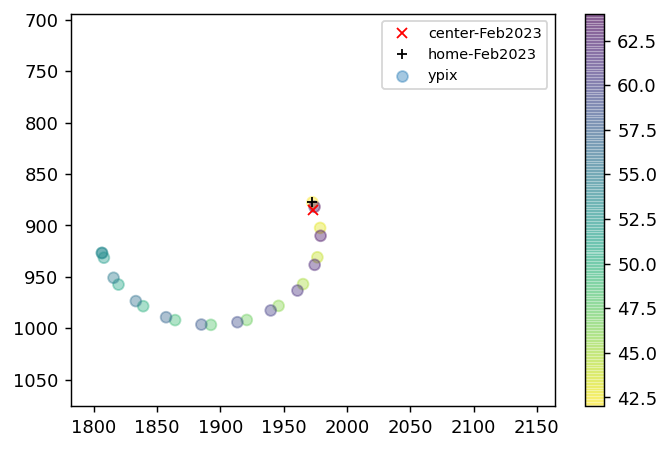

In [74]:
msk = db.label.str.contains('arcphi15-20230203-135642')

xc, yc = (1973, 885)
r = 171+20

plt.scatter("xpix","ypix",c = list(db[msk].index), cmap='viridis_r', alpha=0.4, data=db[msk])
plt.colorbar()
plt.xlim(xc-r,xc+r)
plt.ylim(yc+r, yc-r)
plt.plot(xc,yc, 'rx', label='center-Feb2023')


plt.plot( 1972.1612173606197, 877.6276787398024, 'k+', label='home-Feb2023')
plt.legend(loc='best', fontsize=8)

In [19]:
db

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64')

In [27]:
db2.to_csv('testdb.csv', index=False, sep=' ')

In [ ]:
"label mount move posid direction speed motor angle xpix ypix peaks fwhm"


In [145]:
db= pd.read_csv('output/database.csv', sep=' ')

new = db.label.str.split("-", n=1, expand=True)
new.columns = ['label', 'session']
db['label'] = new['label']
db.insert(1, "session", new['session'])
db['session'] = pd.to_datetime(db['session'], format= '%Y%m%d-%H%M%S' )#.dt.time
db.tail()

,label,session,mount,move,posid,direction,speed,motor,angle,xpix,ypix,peaks,fwhm
61,arcphi15,2023-02-03 13:56:42,0,20230203-135942,4852,ccw,cruise,phi,15,1974.445727,938.294885,73679.2652,3.2591
62,arcphi15,2023-02-03 13:56:42,0,20230203-135951,4852,ccw,cruise,phi,15,1979.136792,910.061193,73264.1201,3.2871
63,arcphi15,2023-02-03 13:56:42,0,20230203-140000,4852,ccw,cruise,phi,15,1974.358972,881.839542,75433.6617,3.3597
64,arcphi15,2023-02-03 13:56:42,0,20230203-140009,4852,ccw,cruise,phi,15,1972.708342,877.543105,74716.4871,3.4305
65,arcphi15,2023-02-03 13:56:42,0,20230203-140018,4852,ccw,cruise,phi,15,1972.657046,877.485643,74580.1548,3.4406


In [146]:
msk_time = (db['session'] > np.datetime64("2023-02-03 13:36:00")) & \
           (db['session'] <= np.datetime64("2023-02-03 13:52:00"))
db[msk_time]

,label,session,mount,move,posid,direction,speed,motor,angle,xpix,ypix,peaks,fwhm
26,arcth30,2023-02-03 13:41:32,0,20230203-134134,4852,cw,cruise,phi,180,1810.754270,940.379965,73379.3722,3.4359
27,arcth30,2023-02-03 13:41:32,0,20230203-134143,4852,cw,cruise,theta,30,1806.191768,845.797114,73617.2594,3.4137
28,arcth30,2023-02-03 13:41:32,0,20230203-134152,4852,cw,cruise,theta,30,1856.241197,759.927247,72457.2454,3.3036
29,arcth30,2023-02-03 13:41:32,0,20230203-134201,4852,cw,cruise,theta,30,1945.896250,716.515260,71509.5830,3.2366
30,arcth30,2023-02-03 13:41:32,0,20230203-134210,4852,cw,cruise,theta,30,2044.799105,730.700916,71530.3351,3.1900
31,arcth30,2023-02-03 13:41:32,0,20230203-134219,4852,cw,cruise,theta,30,2118.719374,797.715657,72087.1901,3.1720
32,arcth30,2023-02-03 13:41:32,0,20230203-134228,4852,cw,cruise,theta,30,2142.598196,894.476970,73701.4561,3.2838
33,arcth30,2023-02-03 13:41:32,0,20230203-134237,4852,ccw,cruise,theta,30,2121.423705,802.382384,73361.2684,3.1806
34,arcth30,2023-02-03 13:41:32,0,20230203-134245,4852,ccw,cruise,theta,30,2049.487224,733.014727,71546.8315,3.2013
35,arcth30,2023-02-03 13:41:32,0,20230203-134254,4852,ccw,cruise,theta,30,1951.170257,715.788679,71944.6037,3.2065


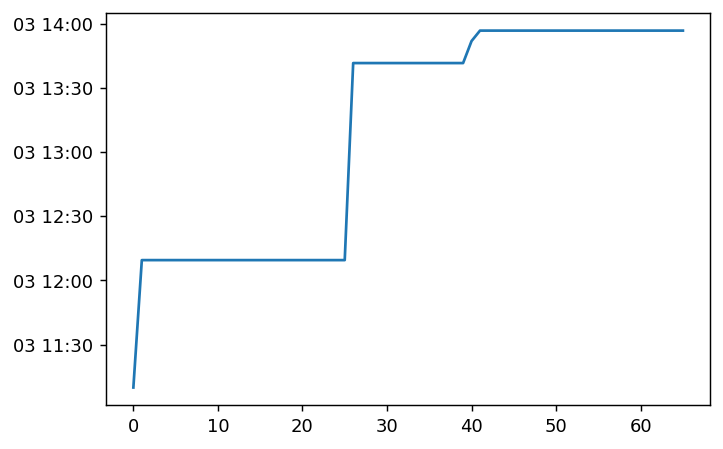

In [147]:
plt.plot(db['session'])

In [148]:
pix2mm = 0.0352046783625731

In [169]:
xmm = db['xpix'].values *pix2mm
ymm = db['ypix'].values *pix2mm
db['xmm'] = xmm
db['ymm'] = ymm

In [201]:
msk = db['label'].str.contains("getpic") | db['label'].str.contains("curr")
msk = ~msk
msk = db['label'].str.contains("arcth")
color = db['direction'][msk].values =="cw"
color = ['b' if i else 'r' for i in color]



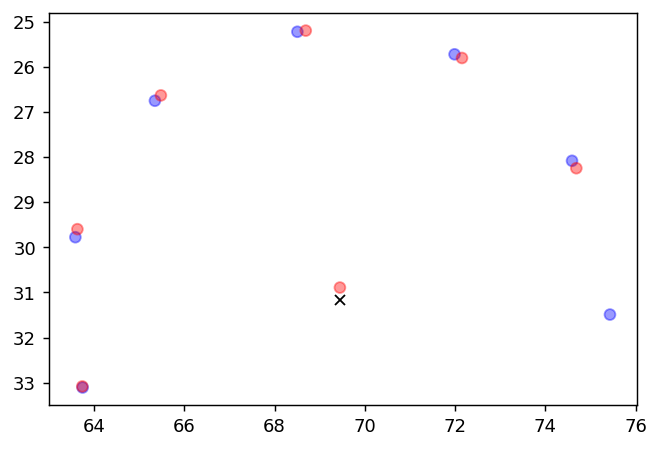

In [202]:
plt.scatter('xmm', 'ymm', data =db[msk],  color=color, alpha=0.4)
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal')
# plt.xlim(xc-r,xc+r)
# plt.ylim(yc+r, yc-r)
plt.plot(xc*pix2mm, yc*pix2mm, 'kx', label='center-Feb2023')

# plt.gca().set_inversey()

In [262]:
# check_physical_lim = db[msk]
# check_physical_lim.to_csv("output/physical_limit.csv", sep=" ")

msk_time = (db['session'] > np.datetime64("2023-02-03 13:36:00")) & \
           (db['session'] <= np.datetime64("2023-02-03 13:52:00"))

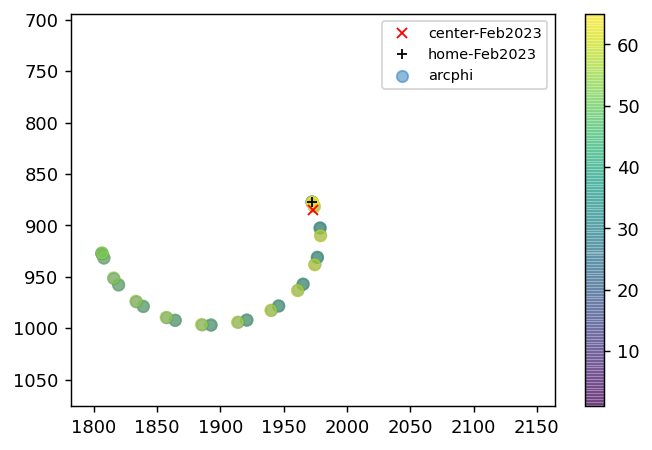

In [343]:
db = pd.read_csv('output/database.csv', sep=' ')

msk2 = db.label.str.contains('arcph')
msk = db.index>65

xc, yc = (1973, 885)
r = 171+20

# plt.scatter("xpix","ypix",c = list(db[msk].index), cmap='viridis_r', alpha=0.4, data=db[msk], label='idx > 65')

plt.scatter("xpix","ypix",c = list(db[msk2].index), marker='o',s=40, alpha=0.5, data=db[msk2], label='arcphi')

plt.colorbar()
plt.xlim(xc-r,xc+r)
plt.ylim(yc+r, yc-r)
plt.plot(xc,yc, 'rx', label='center-Feb2023')


plt.plot( 1972.1612173606197, 877.6276787398024, 'k+', label='home-Feb2023')
plt.legend(loc='best', fontsize=8)

# plt.plot(db['xpix'].iloc[-1], db['ypix'].iloc[-1], 'y*', ms=10,)

In [344]:
db

,label,mount,move,posid,direction,speed,motor,angle,xpix,ypix,peaks,fwhm
0,curreposition-20230203-110958,0,20230203-111001,4852,cw,cruise,theta,0,1972.161217,877.627679,75521.3256,3.3406
1,arcphi15-20230203-120929,0,20230203-120931,4852,cw,cruise,phi,0,1972.512194,877.419182,73646.1300,3.3528
2,arcphi15-20230203-120929,0,20230203-120940,4852,cw,cruise,phi,15,1978.753213,902.512606,74605.0360,3.3693
3,arcphi15-20230203-120929,0,20230203-120949,4852,cw,cruise,phi,15,1976.627232,931.062076,78369.6116,3.5316
4,arcphi15-20230203-120929,0,20230203-120958,4852,cw,cruise,phi,15,1965.341254,957.173044,76179.1692,3.4034
...,...,...,...,...,...,...,...,...,...,...,...,...
94,getpic-20230203-172723,0,20230203-172725,4852,cw,cruise,theta,0,1974.969916,938.424093,71969.1394,3.2934
95,getpic-20230203-172821,0,20230203-172824,4852,cw,cruise,theta,0,1979.348042,916.309072,72774.3027,3.2349
96,getpic-20230203-173103,0,20230203-173105,4852,cw,cruise,theta,0,1977.806155,893.778607,75921.4581,3.3759
97,getpic-20230203-173222,0,20230203-173225,4852,cw,cruise,theta,0,1973.502021,879.274755,74347.6624,3.3601


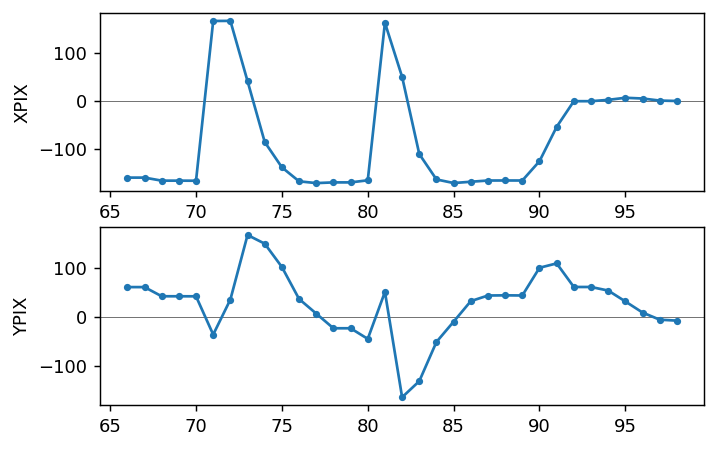

In [310]:
plt.subplot(211);plt.ylabel('XPIX');
plt.plot(db['xpix'][msk]-xc, '.-')
plt.axhline(0, c='k', lw=.3, zorder=0)

plt.subplot(212);plt.ylabel('YPIX'); 
plt.plot(db['ypix'][msk]-yc, '.-')
plt.axhline(0, c='k', lw=.3, zorder=0)
